In [1]:
import scanpy as sc
import scipy as sp
import numpy as np
import utils

# Gaussian neibourhood generation using MrVI latent space 

In [2]:
# ranked_genes_gauss = utils.mrvi_identify_cell_states(adata, 'X_mrvi_z', neighbor_method='gauss')

In [3]:
adata_gauss = utils.load_pickle('./../data/pickles/processed_adata.pickle')
adata_gauss

AnnData object with n_obs × n_vars = 9265 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes', 'leiden'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'neighbors', 'leiden', 'rank_genes_groups'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys'
    obsp: 'distances', 'connectivities'

In [4]:
adata_gauss.obsp['connectivities'] = sp.sparse.csr_matrix(adata_gauss.obsp['connectivities'], dtype=np.float32)

In [5]:
sc.tl.umap(adata_gauss)

# KNN neighbourhood generation using MrVI latent space

In [6]:
adata_knn = sc.read('./../data/MrVIoutputs/bacdrop.h5ad')
adata_knn

AnnData object with n_obs × n_vars = 34410 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys'

In [7]:
adata_knn = utils.process_adata(adata_knn)
adata_knn = utils.cluster_adata(adata_knn, feature_space='X_mrvi_z', neighbor_method='knn')
adata_knn

AnnData object with n_obs × n_vars = 6917 × 1737
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes', 'leiden'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'leiden', 'umap'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys', 'X_umap'
    obsp: 'distances', 'connectivities'

# UMAP Clustering Comparison Visual

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


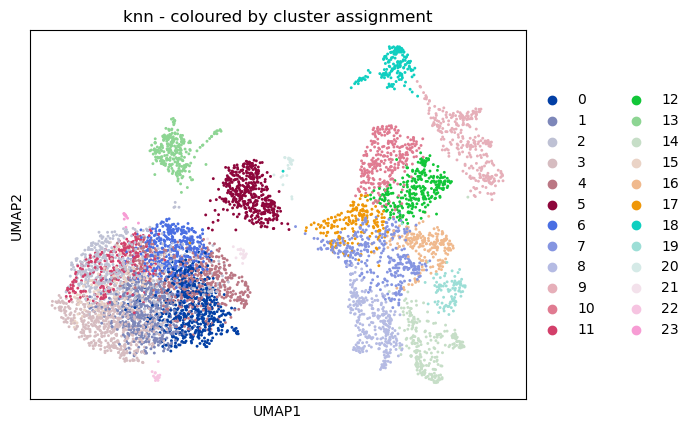

In [8]:
sc.pl.umap(adata_knn, color='leiden', title="knn - coloured by cluster assignment")

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


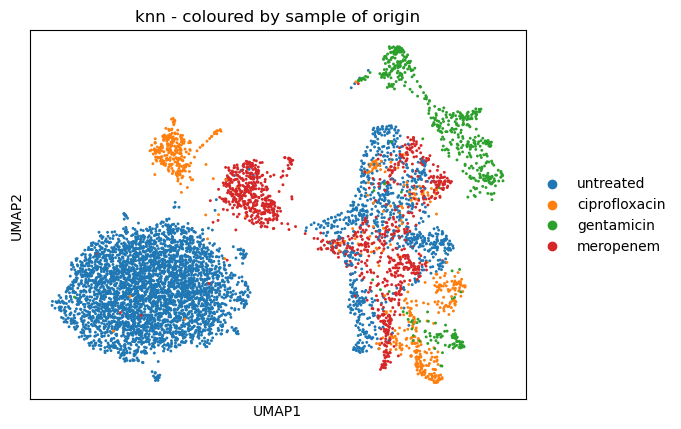

In [14]:
sc.pl.umap(adata_knn, color='sample', title="knn - coloured by sample of origin")

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


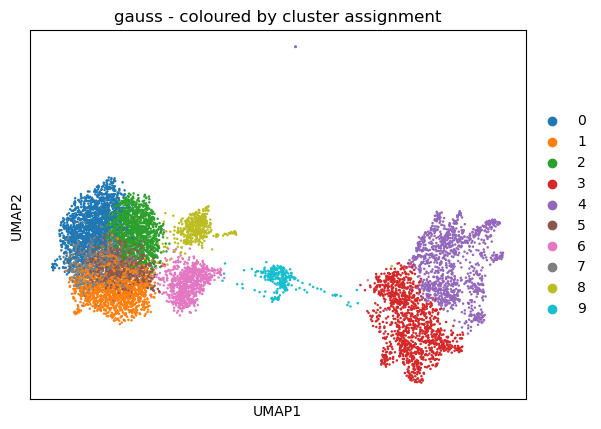

In [10]:
sc.pl.umap(adata_gauss, color='leiden', title="gauss - coloured by cluster assignment")

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


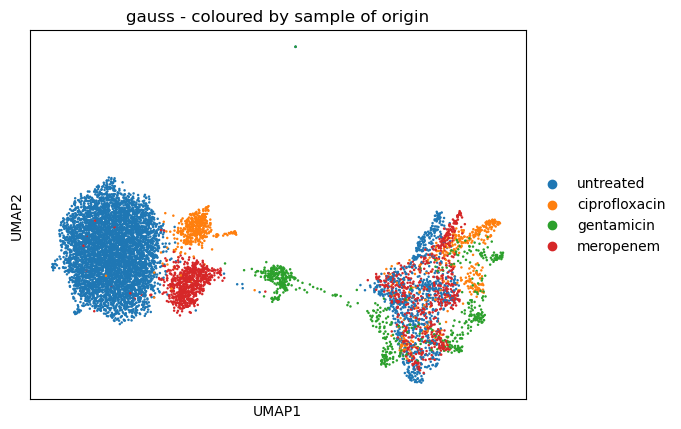

In [11]:
sc.pl.umap(adata_gauss, color='sample', title="gauss - coloured by sample of origin")

# Visualizing dispersion of significant 'genes' (accession numbers)
<pre>
cds-WP_032429669.1    => porin OmpC (Forms pores that allow passive diffusion of small molecules across the outer membrane.)</br>
cds-WP_004177236.1    => Acriflavine resistance protein A Confers AMR </br>
cds-WP_013815099.1-12 => IS5-like element IS903B family transposase </br>
cds-WP_004177236.1    => multidrug efflux RND transporter periplasmic adaptor subunit AcrA
cds-WP_187079192.1    => IS5-like element IS903B family transposase </br>
cds-WP_002919766.1    => 30S ribosomal protein S3 </br>
cds-WP_013815099.1-30 => IS5-like element IS903B family transposase
cds-WP_004145074.1    => heat shock chaperone IbpB
</pre>

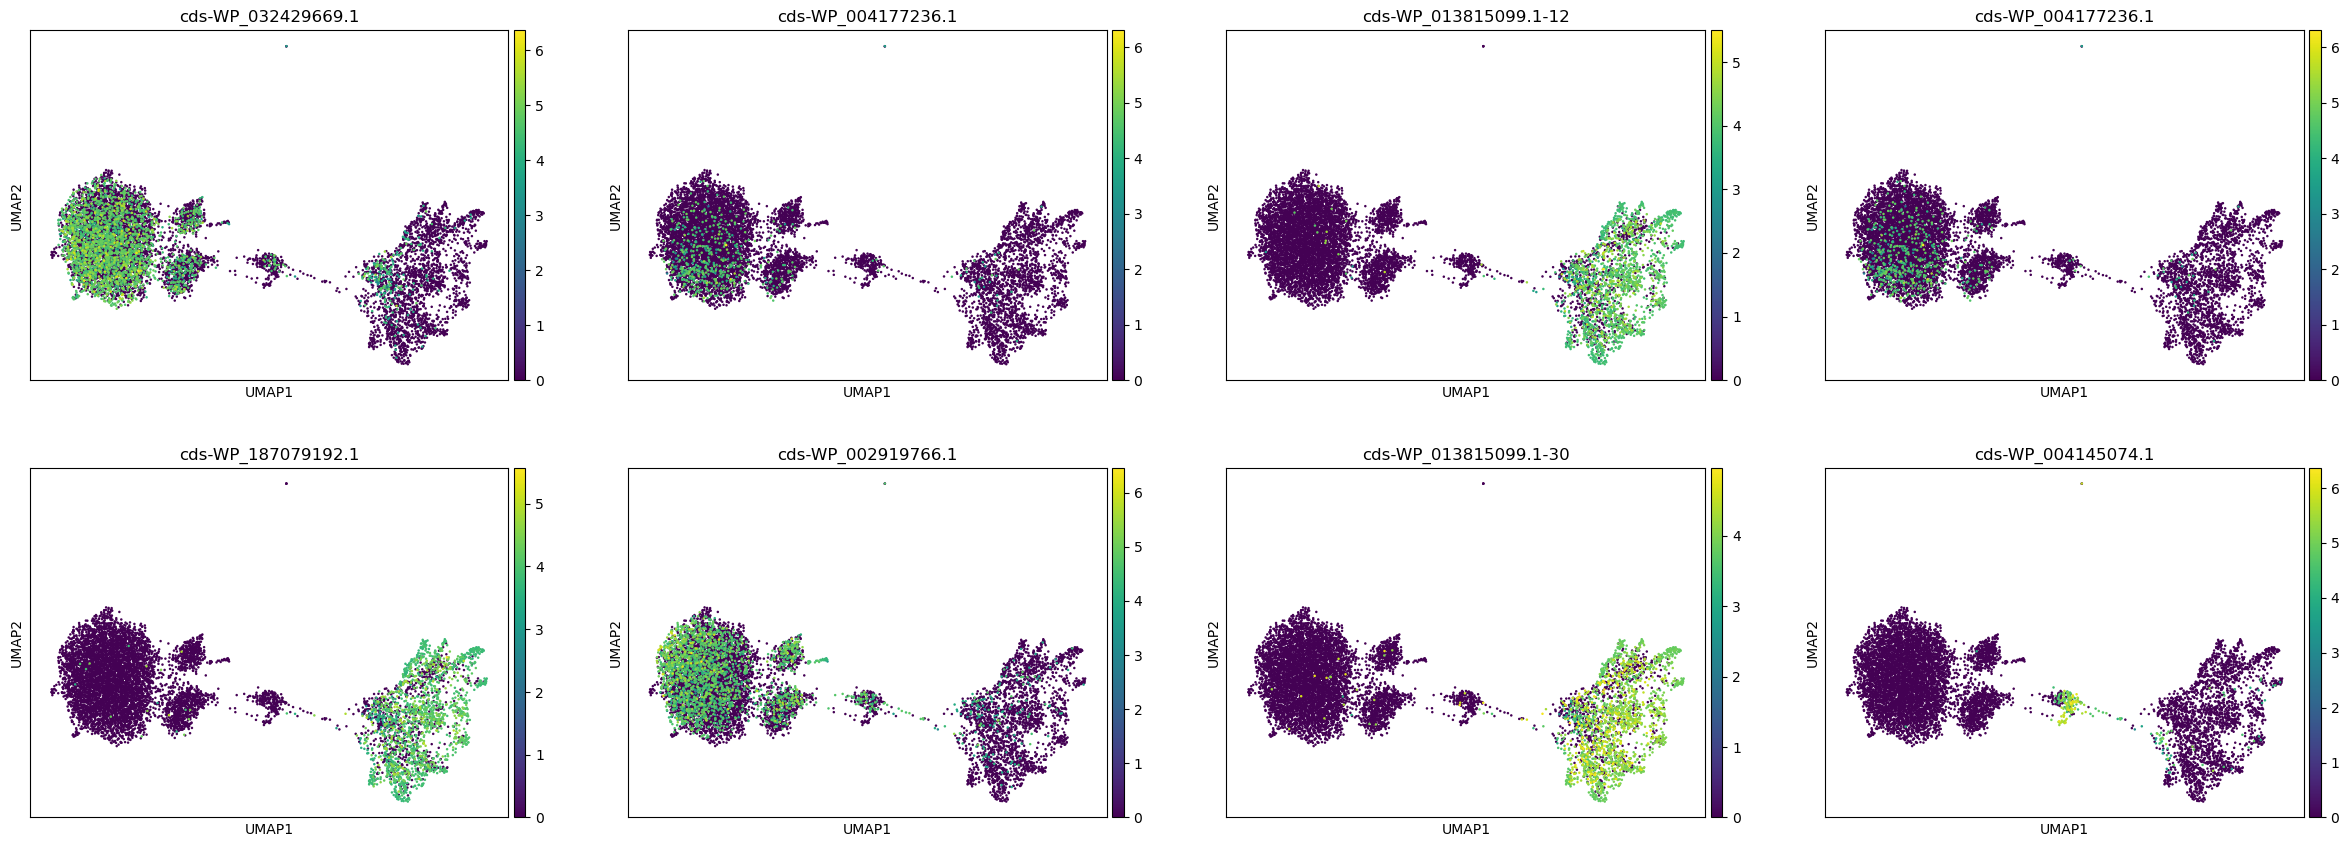

In [12]:
sc.pl.umap(adata_gauss, color=['cds-WP_032429669.1', 'cds-WP_004177236.1', 'cds-WP_013815099.1-12','cds-WP_004177236.1',
                               'cds-WP_187079192.1', 'cds-WP_002919766.1', 'cds-WP_013815099.1-30', 'cds-WP_004145074.1'])
# adata_knn.var_names.__contains__('cds-WP_187079192.1')